## Introduction
This notebook series propose a data preprocessing script to visualize the correlation between access to clean drinking water and adult mortality using data from accross the world.
The datasets used for this experiment were downloaded from WHO open data. [Learn more about WHO datasets](https://apps.who.int/gho/data/node.home)and how the rates are calculated.


### Step 1. Load the first dataset about drinking water access that was previously cleaned
Check what our datasets look like and so as to only keep the rows and columns we need

In [42]:
## Load 1st CSV file
import pandas as pd
import numpy as np
import scipy.stats as stats

url1 = 'my_data/new_drinking_water.csv'
df1 = pd.read_csv(url1, delimiter=',')
print(f"df1 type: {type(df1)}")   ## df type: <class 'pandas.core.frame.DataFrame'>
print(f"df1 shape: {df1.shape}")  ## df shape: (196,22)'

df1 type: <class 'pandas.core.frame.DataFrame'>
df1 shape: (196, 22)


In [43]:
## Check the details of the dataset 
df1.info()

## DETAILS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  196 non-null    object 
 1   2020       182 non-null    float64
 2   2019       186 non-null    float64
 3   2018       187 non-null    float64
 4   2017       193 non-null    float64
 5   2016       195 non-null    float64
 6   2015       195 non-null    float64
 7   2014       195 non-null    float64
 8   2013       195 non-null    float64
 9   2012       195 non-null    float64
 10  2011       195 non-null    float64
 11  2010       194 non-null    float64
 12  2009       194 non-null    float64
 13  2008       194 non-null    float64
 14  2007       195 non-null    float64
 15  2006       195 non-null    float64
 16  2005       194 non-null    float64
 17  2004       192 non-null    float64
 18  2003       192 non-null    float64
 19  2002       192 non-null    float64
 20  2001      

In [44]:
## Check the fisrt rows of the dataset
df1.head(8)

,Countries,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,75.0,72.0,70.0,67.0,64.0,61.0,59.0,56.0,53.0,...,46.0,43.0,41.0,38.0,36.0,34.0,32.0,30.0,28.0,28.0
1,Albania,95.0,95.0,94.0,94.0,94.0,93.0,93.0,93.0,92.0,...,91.0,90.0,90.0,90.0,89.0,89.0,88.0,87.0,87.0,87.0
2,Algeria,94.0,94.0,94.0,94.0,94.0,93.0,93.0,93.0,93.0,...,92.0,92.0,92.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0
3,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,Angola,57.0,57.0,57.0,56.0,55.0,54.0,54.0,53.0,52.0,...,50.0,49.0,48.0,47.0,46.0,45.0,44.0,43.0,42.0,41.0
5,Antigua and Barbuda,NaN,NaN,NaN,97.0,97.0,97.0,97.0,97.0,97.0,...,97.0,97.0,97.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
6,Argentina,NaN,NaN,NaN,NaN,99.0,99.0,99.0,99.0,99.0,...,98.0,98.0,98.0,98.0,97.0,97.0,97.0,97.0,97.0,96.0
7,Armenia,100.0,100.0,100.0,100.0,100.0,100.0,99.0,99.0,99.0,...,98.0,98.0,97.0,97.0,97.0,96.0,96.0,96.0,95.0,95.0


In [45]:
df1.columns

Index(['Countries', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000'],
      dtype='object')

### Step 2 - Load and clean the second dataset about mortality rate for adults around the world
The original data includes every country recognized by the WHO. The Adult mortality rate is defined as the probability that those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons). In other words, a value of 150 means that out of 1,000 persons who have reached age 15, 150 are expected to die before reaching age 60, and 850 are expected to survive to age 60. 

In [46]:
## Load 2nd CSV file containing data for Region of the Americas

url2 = 'adult_mort_data/adult_mortality.csv'
df2 = pd.read_csv(url2, delimiter=',')
print(f"df2 type: {type(df2)}")   ## df type: <class 'pandas.core.frame.DataFrame'>
print(f"df2 shape: {df2.shape}")  ## df shape: (3112, 5)'

df2 type: <class 'pandas.core.frame.DataFrame'>
df2 shape: (3112, 5)


In [47]:
## Check the details of the dataset 
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 5 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Unnamed: 0                                                                                 3112 non-null   object
 1   Unnamed: 1                                                                                 3112 non-null   object
 2   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)    3112 non-null   object
 3   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1  3112 non-null   object
 4   Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2  3112 non-null   object
dtypes: object(5)
memory usage: 121.7+ KB


In [48]:
## Check the fisrt rows of the dataset
df2.head(8)

,Unnamed: 0,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
0,"Countries, territories and areas",Year,Both sexes,Male,Female
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215
5,Afghanistan,2012,242,262,221
6,Afghanistan,2011,248,268,227
7,Afghanistan,2010,255,275,233


In [49]:
# Rename the columns we will keep so that they can be more descriptive
old_column0 = 'Unnamed: 0'
new_column0 = 'Countries'
old_column1 = 'Unnamed: 1'
new_column1 = 'Year'
old_column2 = 'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)'
new_column2 = 'Adult mortality rate per 1000'
df2.rename(columns={old_column0: new_column0}, inplace=True)
df2.rename(columns={old_column1: new_column1}, inplace=True)
df2.rename(columns={old_column2: new_column2}, inplace=True)

# Display the updated column names
print("\nUpdated column names:")
print(df2.columns)



Updated column names:
Index(['Countries', 'Year', 'Adult mortality rate per 1000',
       'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1',
       'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2'],
      dtype='object')


In [50]:
# Delete the first row by index, since it will be a repetition of column names
my_row_index = 0
df2 = df2.drop(my_row_index)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df2)


Updated DataFrame:
        Countries  Year Adult mortality rate per 1000  \
1     Afghanistan  2016                           245   
2     Afghanistan  2015                           233   
3     Afghanistan  2014                           234   
4     Afghanistan  2013                           235   
5     Afghanistan  2012                           242   
...           ...   ...                           ...   
3107     Zimbabwe  2004                           694   
3108     Zimbabwe  2003                           697   
3109     Zimbabwe  2002                           695   
3110     Zimbabwe  2001                           688   
3111     Zimbabwe  2000                           675   

     Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1  \
1                                                   272                                          
2                                                   254                                          
3

In [51]:
## Handpicking the columns we want to keep
## For each year, we want the rate of under-five children mortality, per country
our_columns = ['Countries', 'Year', 'Adult mortality rate per 1000']
df2[our_columns]
## Dataframe shape change from [3111 rows x 5 columns] to [3111 rows × 3 columns]

,Countries,Year,Adult mortality rate per 1000
1,Afghanistan,2016,245
2,Afghanistan,2015,233
3,Afghanistan,2014,234
4,Afghanistan,2013,235
5,Afghanistan,2012,242
...,...,...,...
3107,Zimbabwe,2004,694
3108,Zimbabwe,2003,697
3109,Zimbabwe,2002,695
3110,Zimbabwe,2001,688


In [52]:
## Pivot the DataFrame so that the second dataframe has the same shape as the first one

# Pivot the DataFrame
df2_pivot = df2.pivot(index='Countries', columns='Year', values='Adult mortality rate per 1000')
# Reset the index and rename the columns
df2_pivot = df2_pivot.reset_index().rename_axis(None, axis=1)

# Display the updated DataFrame
df2_pivot.head(10)

,Countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,316,307,292,286,282,277,276,273,265,260,255,248,242,235,234,233,245
1,Albania,106,100,102,107,101,106,101,101,102,103,103,103,103,100,98,92,96
2,Algeria,142,139,135,133,125,119,115,111,108,107,104,103,101,100,98,96,95
3,Angola,384,372,355,343,334,323,314,303,292,281,270,260,253,249,244,240,238
4,Antigua and Barbuda,157,154,149,151,153,156,155,149,147,138,135,128,127,127,127,122,120
5,Argentina,139,138,137,134,128,125,124,126,123,123,119,118,118,116,113,113,111
6,Armenia,143,143,137,137,135,140,145,137,144,142,138,135,131,121,118,121,116
7,Australia,77,74,72,69,67,68,65,65,64,65,63,62,60,60,61,62,61
8,Austria,94,90,87,86,84,84,80,80,76,77,74,72,68,67,65,64,62
9,Azerbaijan,161,149,144,151,151,160,153,141,142,133,132,129,126,124,121,120,118


In [53]:
# Doublecheck what the second dataset looks like now
df2 = df2_pivot

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df2)     ## New df shape is [183 rows x 18 columns] vs df1 df1 shape: (196, 22)


Updated DataFrame:
                              Countries 2000 2001 2002 2003 2004 2005 2006  \
0                           Afghanistan  316  307  292  286  282  277  276   
1                               Albania  106  100  102  107  101  106  101   
2                               Algeria  142  139  135  133  125  119  115   
3                                Angola  384  372  355  343  334  323  314   
4                   Antigua and Barbuda  157  154  149  151  153  156  155   
..                                  ...  ...  ...  ...  ...  ...  ...  ...   
178  Venezuela (Bolivarian Republic of)  173  175  175  180  168  164  168   
179                            Viet Nam  139  138  137  137  137  137  137   
180                               Yemen  251  251  250  249  248  246  243   
181                              Zambia  594  594  594  593  575  556  532   
182                            Zimbabwe  675  688  695  697  694  681  660   

    2007 2008 2009 2010 2011 2012 2013 2014

In [54]:
## We notice that df1 has more rows (more countries entries) that df2: df1 shape [196 rows x 22 columns]  VS df2 shape which is [183 rows x 18 columns] 

# Get the list of countries in df1 but not in df2
extra_countries = set(df1['Countries']) - set(df2['Countries'])

# Display the extra rows
print(extra_countries)


{'Niue', 'Dominica', 'Anguilla', 'Andorra', 'Saint Kitts and Nevis', 'Monaco', 'Palau', 'San Marino', 'Marshall Islands', 'Tuvalu', 'Nauru', 'occupied Palestinian territory, including east Jerusalem', 'Cook Islands'}


In [55]:
# Filter df1 to remove the rows with extra countries
df1 = df1[~df1['Countries'].isin(extra_countries)]

print(f"df1 shape: {df1.shape}") ## df1 shape goes from [196, 22] to [183, 22] 

df1 shape: (183, 22)


In [56]:
## We also noticed that df1 have more columns (years entries from 2000 to 2020) than  df2 (years entries from 2000 to 2016) 
## df1 shape recently updates [183 rows x 22 columns]  VS df2 shape which is [183 rows x 18 columns] 

# Get the list of years in df1 but not in df2
extra_years = [col for col in df1.columns if col not in df2.columns]

# Display the extra columns
print(extra_years)   

['2020', '2019', '2018', '2017']


In [57]:
# Let's remove the extra years from df1 so that the datasets have the same shape
df1 = df1.drop(extra_years, axis=1)

print(f"df1 shape: {df1.shape}")  ## df1 shape goes from [183, 22] to [183, 18] 

df1 shape: (183, 18)


In [58]:
## Check df2 shape to validate that is similar to df1
print(f"df2 shape: {df2.shape}")    ## df2 shape is also [183, 18] just like df1

df2 shape: (183, 18)


In [20]:
# Save the modified datasets to new CSV files that will be used in the next steps
#df1.to_csv('my_data/adult_drinking_water.csv', index=False)
#df2.to_csv('adult_mort_data/new_adult_mortality.csv', index=False)

### Step 3 -  Make sure the data is machine readable and replace missing values
We've saved our final datasets into new files.
We will now load them and make some transformations so they can be added to a ML model

In [65]:
## Load both CSV files and ensure they have the same number of rows and columns

url_df1 = 'my_data/adult_drinking_water.csv'
my_df1 = pd.read_csv(url_df1, delimiter=',')

url_df2 = 'adult_mort_data/new_adult_mortality.csv'
my_df2 = pd.read_csv(url_df2, delimiter=',')

print(f"my_df1 type: {type(my_df1)}")   ## my_df1 type: <class 'pandas.core.frame.DataFrame'>
print(f"my_df1 shape: {my_df1.shape}")  ## my_df1 shape: (183, 18)

print(f"my_df2 type: {type(my_df2)}")   ## my_df2 type: <class 'pandas.core.frame.DataFrame'>
print(f"my_df2 shape: {my_df2.shape}")  ## my_df2 shape: (183, 18)

my_df1 type: <class 'pandas.core.frame.DataFrame'>
my_df1 shape: (183, 18)
my_df2 type: <class 'pandas.core.frame.DataFrame'>
my_df2 shape: (183, 18)


In [66]:
## Check the details of the 1st dataset
my_df1.info()   ## We can see the type of the data entries is float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  183 non-null    object 
 1   2016       182 non-null    float64
 2   2015       182 non-null    float64
 3   2014       182 non-null    float64
 4   2013       182 non-null    float64
 5   2012       182 non-null    float64
 6   2011       182 non-null    float64
 7   2010       181 non-null    float64
 8   2009       181 non-null    float64
 9   2008       181 non-null    float64
 10  2007       182 non-null    float64
 11  2006       182 non-null    float64
 12  2005       181 non-null    float64
 13  2004       179 non-null    float64
 14  2003       179 non-null    float64
 15  2002       179 non-null    float64
 16  2001       177 non-null    float64
 17  2000       177 non-null    float64
dtypes: float64(17), object(1)
memory usage: 25.9+ KB


In [67]:
## Check the details of the 2nd dataset
my_df2.info() ## We can see the type of the data entries is int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Countries  183 non-null    object
 1   2000       183 non-null    int64 
 2   2001       183 non-null    int64 
 3   2002       183 non-null    int64 
 4   2003       183 non-null    int64 
 5   2004       183 non-null    int64 
 6   2005       183 non-null    int64 
 7   2006       183 non-null    int64 
 8   2007       183 non-null    int64 
 9   2008       183 non-null    int64 
 10  2009       183 non-null    int64 
 11  2010       183 non-null    int64 
 12  2011       183 non-null    int64 
 13  2012       183 non-null    int64 
 14  2013       183 non-null    int64 
 15  2014       183 non-null    int64 
 16  2015       183 non-null    int64 
 17  2016       183 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 25.9+ KB


In [68]:
# Count the total number of empty or NaN values in both datasets
missing_values_df1 = my_df1.isnull().sum().sum()
missing_values_df2 = my_df2.isnull().sum().sum()

# Display the result
print("Total number of empty or NaN values in the 1st dataset:", missing_values_df1) ## 40 missing values
print("Total number of empty or NaN values in the 2nd dataset:", missing_values_df2) ## 0 missing values

Total number of empty or NaN values in the 1st dataset: 40
Total number of empty or NaN values in the 2nd dataset: 0


In [69]:
# Replace missing values in the first dataset with column means 
my_df1= my_df1.fillna(df1.mean())
missing_values_df1 = my_df1.isnull().sum().sum()

# Display the updated DataFrame
print("Total number of empty or NaN values in the 1st dataset:", missing_values_df1)
print("Total number of empty or NaN values in the 2nd dataset:", missing_values_df2)

Total number of empty or NaN values in the 1st dataset: 0
Total number of empty or NaN values in the 2nd dataset: 0


C:\Users\esspe\AppData\Local\Temp\ipykernel_24292\2504364712.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_df1= my_df1.fillna(df1.mean())


### Step 4 - Ensure the data is in a proper format in order to merge both datasets

In [70]:
## First, let's reoder the columns in df1 so they go from 2000 to 2016 and not the other way around

# Create a list of column names in the desired order
new_columns = ['Countries'] + [str(year) for year in range(2000, 2017)]

# Reorder the columns
my_df1 = my_df1.reindex(columns=new_columns)

# Display the modified DataFrame
my_df1.head(10)

,Countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,28.0,28.0,30.0,32.0,34.0,36.0,38.0,41.0,43.0,46.0,48.0,51.0,53.0,56.0,59.0,61.0,64.0
1,Albania,87.0,87.0,87.0,88.0,89.0,89.0,90.0,90.0,90.0,91.0,91.0,92.0,92.0,93.0,93.0,93.0,94.0
2,Algeria,90.0,90.0,90.0,91.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,93.0,94.0
3,Angola,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,50.0,51.0,52.0,53.0,54.0,54.0,55.0
4,Antigua and Barbuda,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0
5,Argentina,96.0,97.0,97.0,97.0,97.0,97.0,98.0,98.0,98.0,98.0,98.0,99.0,99.0,99.0,99.0,99.0,99.0
6,Armenia,95.0,95.0,96.0,96.0,96.0,97.0,97.0,97.0,98.0,98.0,98.0,99.0,99.0,99.0,99.0,100.0,100.0
7,Australia,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,Austria,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,Azerbaijan,74.0,75.0,76.0,77.0,78.0,80.0,81.0,82.0,83.0,85.0,86.0,87.0,89.0,90.0,91.0,92.0,93.0


In [71]:
## Both datasets have the same columns names (Countries, years 2000-2016)
## So we will update the names of the columns so we can easily differentiate them after merging the datasets

## In the first dataset, let's add _DWU for Drinking Water usage

# Add the string to the names of the last 17 columns 
updated_columns_df1 = [col + "_DWU" if i >= len(my_df1.columns) - 17 else col for i, col in enumerate(my_df1.columns)]

# Rename the columns
my_df1.columns = updated_columns_df1

# Display the updated DataFrame
print(my_df1.columns)

Index(['Countries', '2000_DWU', '2001_DWU', '2002_DWU', '2003_DWU', '2004_DWU',
       '2005_DWU', '2006_DWU', '2007_DWU', '2008_DWU', '2009_DWU', '2010_DWU',
       '2011_DWU', '2012_DWU', '2013_DWU', '2014_DWU', '2015_DWU', '2016_DWU'],
      dtype='object')


In [72]:
## In the second dataset, let's add _AMR for Adult Mortality (15 years old and above)

# Add the string to the names of the last 17 columns
updated_columns_df2 = [col + "_AMR" if i >= len(my_df2.columns) - 17 else col for i, col in enumerate(my_df2.columns)]

# Rename the columns
my_df2.columns = updated_columns_df2

# Display the updated DataFrame
print(my_df2.columns)

Index(['Countries', '2000_AMR', '2001_AMR', '2002_AMR', '2003_AMR', '2004_AMR',
       '2005_AMR', '2006_AMR', '2007_AMR', '2008_AMR', '2009_AMR', '2010_AMR',
       '2011_AMR', '2012_AMR', '2013_AMR', '2014_AMR', '2015_AMR', '2016_AMR'],
      dtype='object')


In [73]:
## Now we can merge both datasets with their similar column 'Countries'
df_final = pd.merge(my_df1,my_df2, on='Countries')

print(f"df_final shape: {df_final.shape}") ## df_final shape: (183, 35)
df_final.head()

df_final shape: (183, 35)


,Countries,2000_DWU,2001_DWU,2002_DWU,2003_DWU,2004_DWU,2005_DWU,2006_DWU,2007_DWU,2008_DWU,...,2007_AMR,2008_AMR,2009_AMR,2010_AMR,2011_AMR,2012_AMR,2013_AMR,2014_AMR,2015_AMR,2016_AMR
0,Afghanistan,28.0,28.0,30.0,32.0,34.0,36.0,38.0,41.0,43.0,...,273,265,260,255,248,242,235,234,233,245
1,Albania,87.0,87.0,87.0,88.0,89.0,89.0,90.0,90.0,90.0,...,101,102,103,103,103,103,100,98,92,96
2,Algeria,90.0,90.0,90.0,91.0,91.0,91.0,91.0,92.0,92.0,...,111,108,107,104,103,101,100,98,96,95
3,Angola,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,303,292,281,270,260,253,249,244,240,238
4,Antigua and Barbuda,98.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,...,149,147,138,135,128,127,127,127,122,120


### Step 5 - Visualize the data for a quick analysis

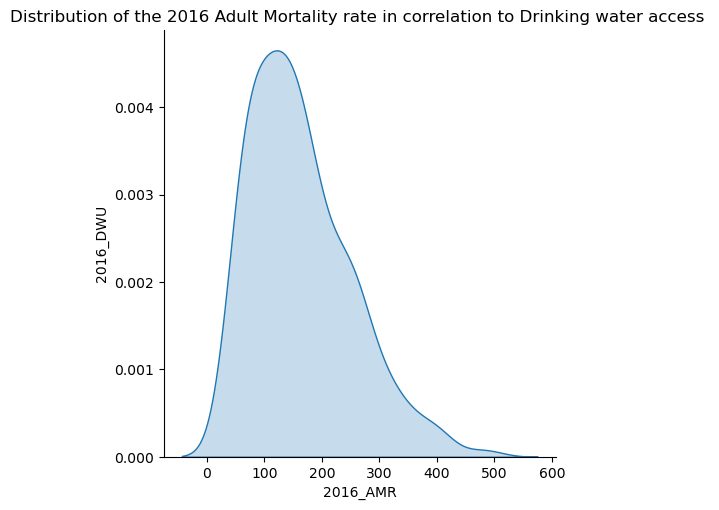

In [74]:
## Display the data in a histogram plot 
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram plot and specify the column to plot
#plt.hist(df_final['mean_CMR'], bins=10)

sns.displot(df_final,x='2016_AMR',kind='kde',fill=True) # smoothed histogram

# Set plot title and labels
plt.title('Distribution of the 2016 Adult Mortality rate in correlation to Drinking water access ')
plt.xlabel('2016_AMR')
plt.ylabel('2016_DWU')

# Display the plot
plt.show()

### Step 6 - Save the updated dataset in a new CSV file

In [75]:
# Save the final DataFrame to a new CSV file
#df_final.to_csv('my_data/water_mort_allcountries.csv', index=False)

## Check the notebook "adult_mortality_prediction" where we train the ML model using this data